# Лабораторная работа №5: Тематическое моделирование

---
---

# Задание:
1. Дана коллекция текстовых документов `2021_SPORT`
2. Необходимо провести тематическое моделирование коллекции методами латентного размещения (аллокации) Дирихле и неотрицательного матричного разложения и визуализировать темы с разным количеством топ-слов, реализовав функцию `plot_top_words`.
    1. Для тематического моделирования понадобится `matplotlib`, `sklearn.feature_extraction.text` (`TfidfVectorizer`, `CountVectorizer`), `sklearn.decomposition` (`NMF`, `LatentDirichletAllocation`)
    2. Для препроцессинга нужно воспользоваться материалами прошлой лабораторной (в части стоп-слов, токенизации и лемматизации)
    3. Затем построить через `CountVectorizer`, `TfidfVectorizer` (попробуйте оба) векторное представление каждого текста (для визуализации полезно также сделать что-то вроде `tfidf_feature_names = tfidf_vectorizer.get_feature_names()`)
    4. Полученные вектора передавать уже в модель для тематического моделирования
    5. Количество признаков — начать с 1000, топиков — 10, топ-слов — 20

---
---

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

import os
import nltk
import pymorphy3

from dataclasses import dataclass, field    
from nltk.tokenize import word_tokenize                           
from typing import List

from matplotlib.backends.backend_pdf import PdfPages

# Создадим структуру для хранения данных
@dataclass   
class Folders: 
    files_name: List[str] = field(default_factory=list)
    data: List[str] = field(default_factory=list)

@dataclass 
class Home:
    path: str = ''
    name: str = ''
    folders_name: List[Folders] = field(default_factory=list)

# Создадим функцию для токенизации текста
def preprocess_text(text):
    nltk.download('punkt')
    nltk.download('stopwords')
    stop_words = set(nltk.corpus.stopwords.words('russian'))
    morph = pymorphy3.MorphAnalyzer()    
    tokens = word_tokenize(text)
    tokens = [morph.parse(token)[0].normal_form for token in tokens if token.isalnum() and not token.isdigit()]
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Функция для получения корпуса слов
def get_corpus():
    home = Home()
    folders = Folders()
    corpus = []
    path_to_file_list = []
    home.path = '/home/kirill/projects/Methods-and-algorithms-for-weakly-structured-data/Methods-and-algorithms-for-weakly-structured-data/lab4/'
    home.name = '2021_SPORT'
    folders_list = os.listdir(home.path + '/' + home.name)

    for i in folders_list:
        home.folders_name.append(i)
        d = os.listdir(home.path + '/' + home.name + '/' + i) 
        folders.files_name.append(d)
        
        for el in folders.files_name:
            for j in el:
                path_to_file_list.append(home.path + '/' + home.name + '/' + i  + '/' + j)
    
    for i in path_to_file_list:
        with open(i, 'r', encoding='utf-8') as f:
            text = f.read()
            text = preprocess_text(text)
            corpus.append(text)
            
    return corpus

# Функция для отображения графиков
def plot_top_words(model, feature_names, n_top_words, titul):
    pdf = PdfPages(titul + '.pdf')
    for topic_idx, topic in enumerate(model.components_):
        message = "Топик #%d: " % topic_idx
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        message += " ".join([feature_names[i] for i in top_words_idx])
        print(message)
        sorted_topic = topic[top_words_idx]
        plt.figure(figsize=(12, 5))
        plt.bar(range(len(top_words_idx)), sorted_topic)
        plt.ylabel('Частота слов')
        plt.xlabel('Слова')
        plt.title(titul + 'Топик {}'.format(topic_idx))
        plt.xticks(range(len(top_words_idx)), [feature_names[i] for i in top_words_idx], rotation=90)
        pdf.savefig()
        plt.show()
    pdf.close()    
    
def Change_vector_representation_method(method):
    if method == 'tfidf_vectorizer':
        vectorizer = TfidfVectorizer(max_features=n_features)
    elif method == 'count_vectorizer':
        vectorizer = CountVectorizer(max_features=n_features)
    return vectorizer
    
    
n_features = 1000
n_components = 10
n_top_words = 20

corpus = get_corpus()

[ Разбивка, для удаление промежуточных данных]

Топик #0: это который зенит матч тренер семак дзюба свой год команда мяч сезон весь подряд мочь слуцкий чемпион всё главный лига


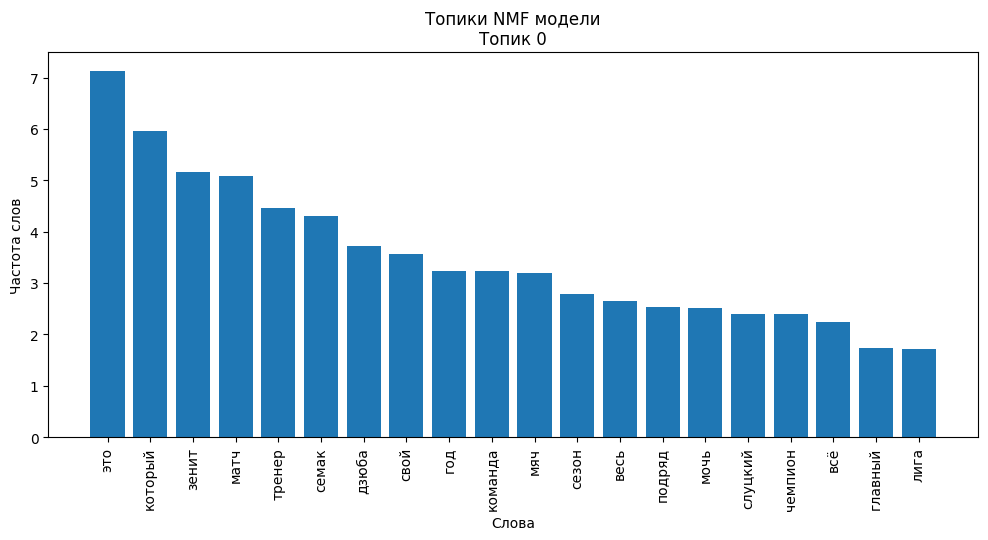

Топик #1: тимур динамо матч хоккейный хоккеист шайба файзутдинов игрок файзутдин март голова лига мхл молодёжный врач попасть клуб ярославль состояние ярославский


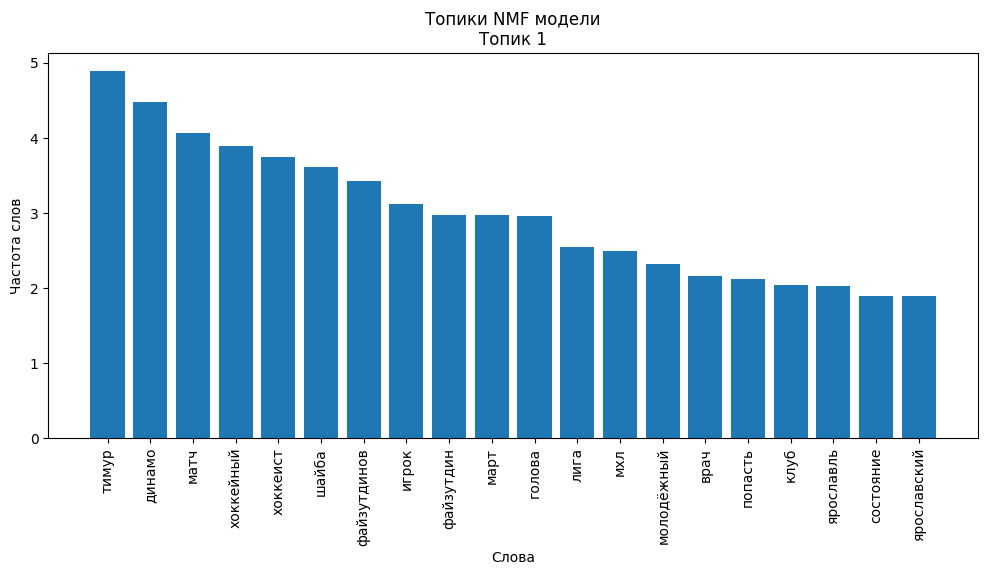

Топик #2: зенит клуб лейпциг это аршавино мочь футболист игрок который нужно чемпион главный год пример развитие модель должный всё миллион евро


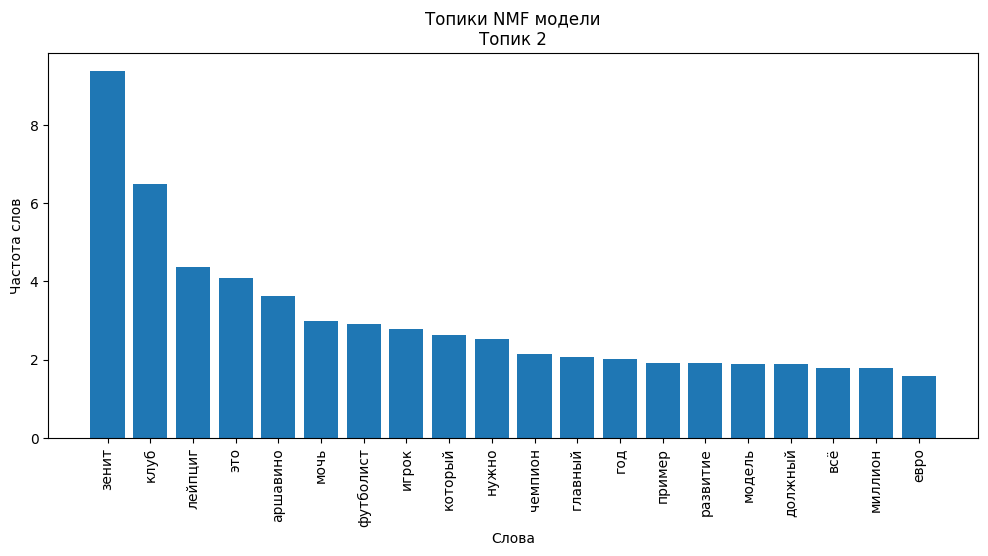

Топик #3: автобус это всё человек сектор вокзал стоять матч стадион ещё минута выход полиция весь сказать болельщик машина хотеть метро ребёнок


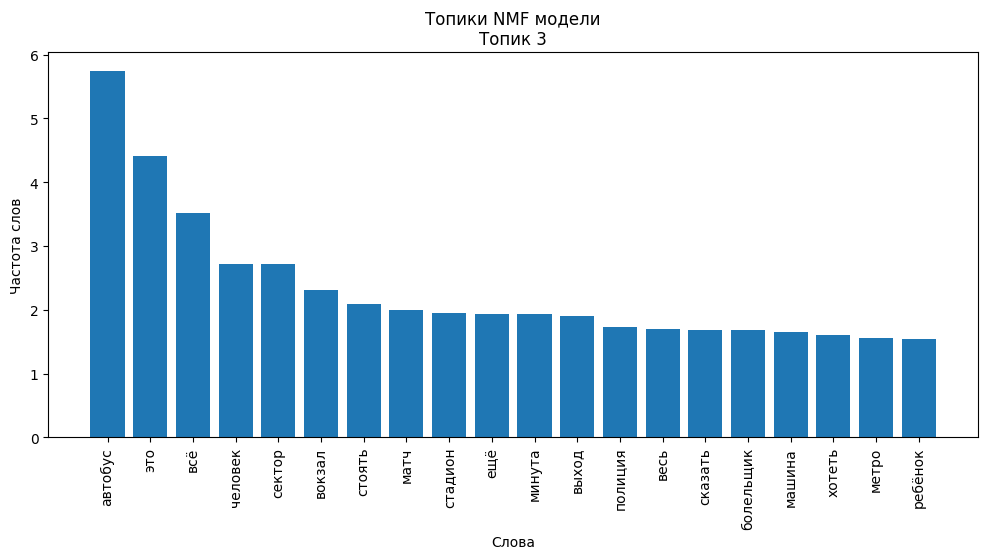

Топик #4: зенит россия чемпионат чемпион клуб стать счёт тур команда локомотив победа подряд рпл который титул российский тренер московский год кубок


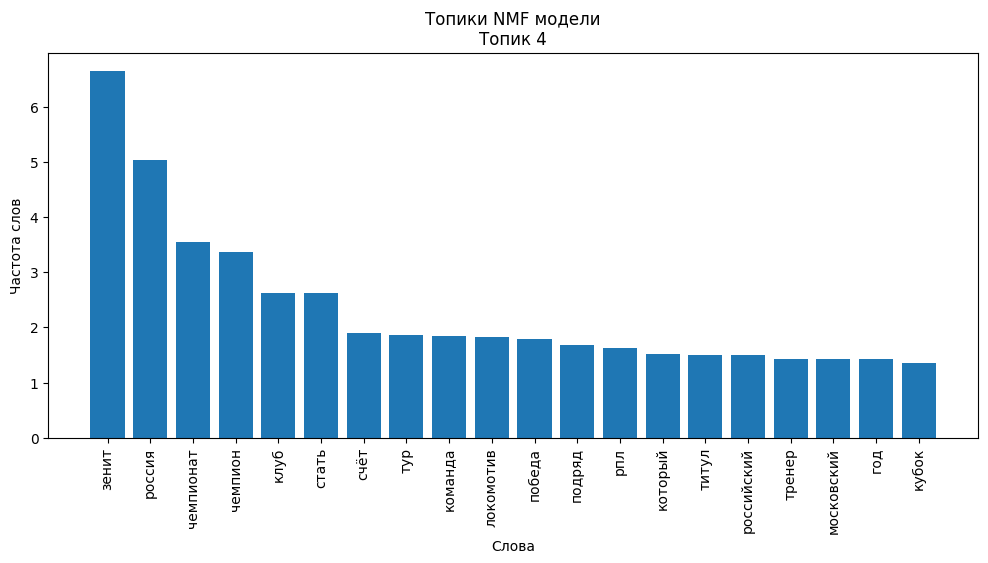

Топик #5: зенит локомотив мяч это передача команда малкома защитник матч самый центр игрок прессинг первый сразу зона дриусся фланг гол линия


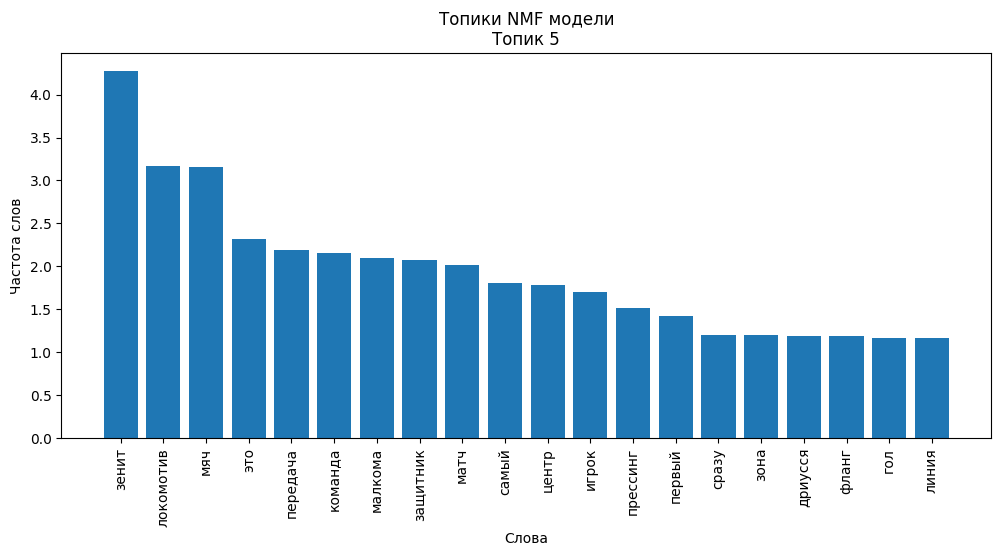

Топик #6: тимур команда это всё свой стать год спасти спортсмен матч парень весь мочь отец очень наш шайба динамо хоккей смерть


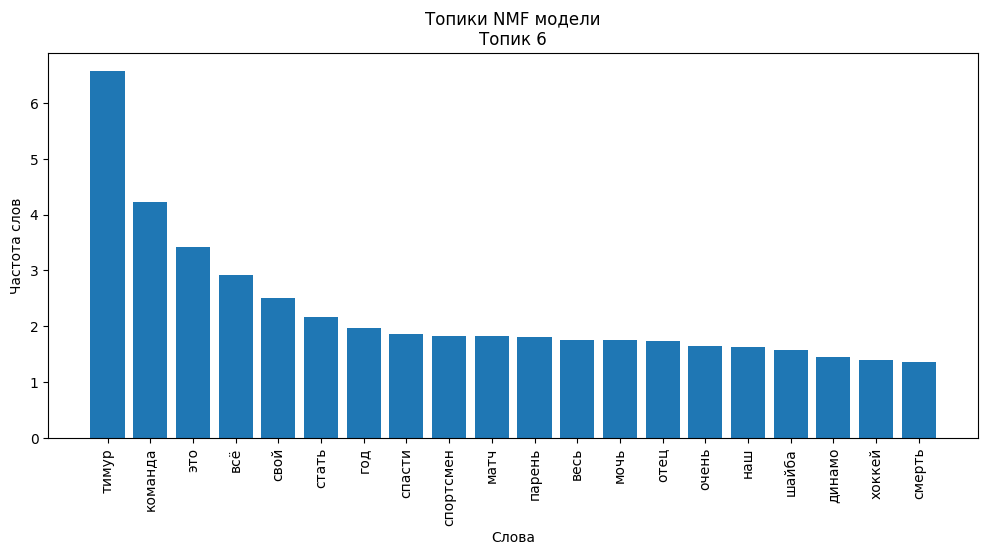

Топик #7: болельщик локомотив зенит матч стадион гостевой команда отношение сектор рпл билет гость клуб мера автобус весь фк заявление рфс безопасность


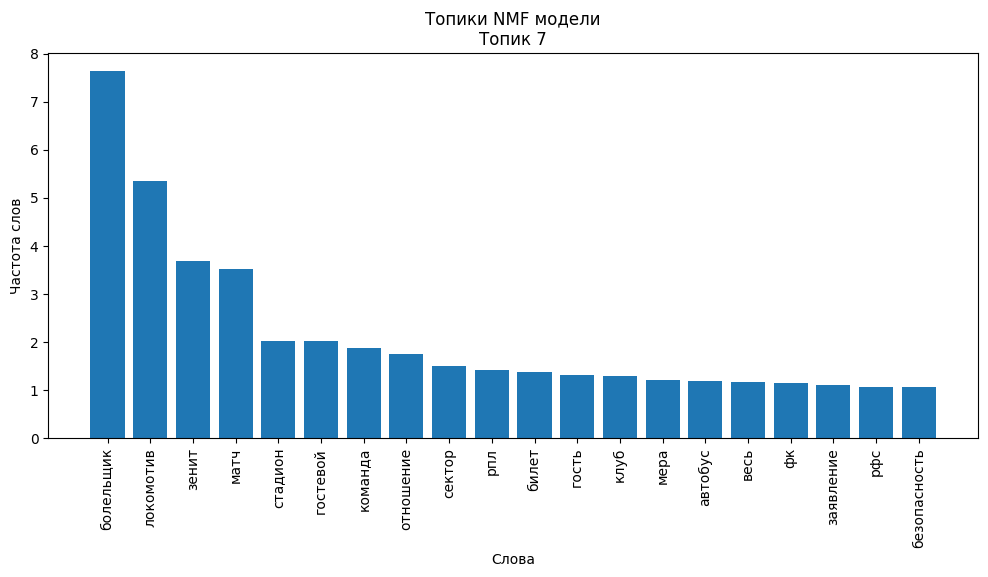

Топик #8: это зенит семак сезон команда всё чемпионство хороший подряд высокий год чемпион весь ещё соперник линия титул свой сергей защитник


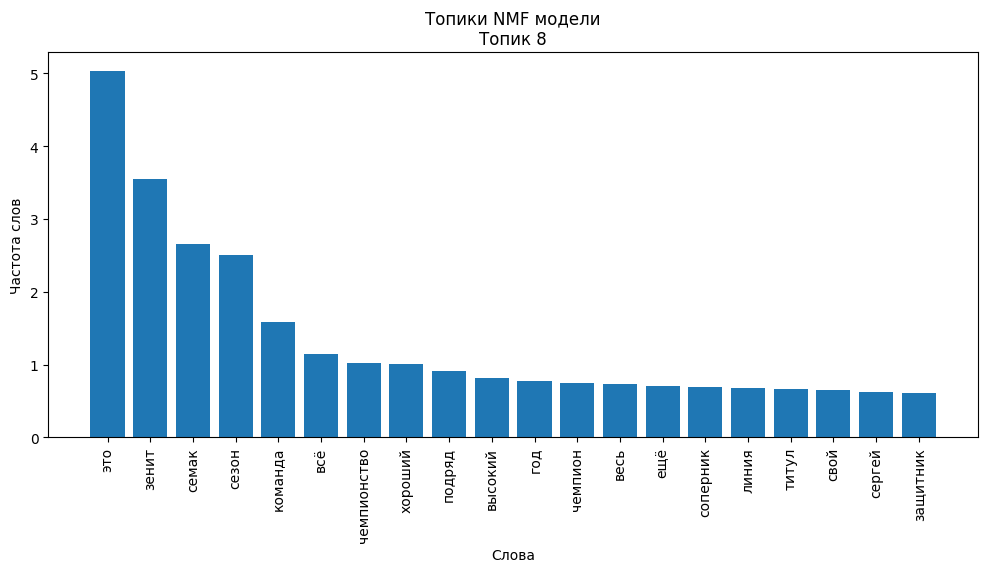

Топик #9: матч дзюба локомотив азмун гол зенит это мяч ворота свой игра питерец первый фол забить чемпионат николич счёт минута очко


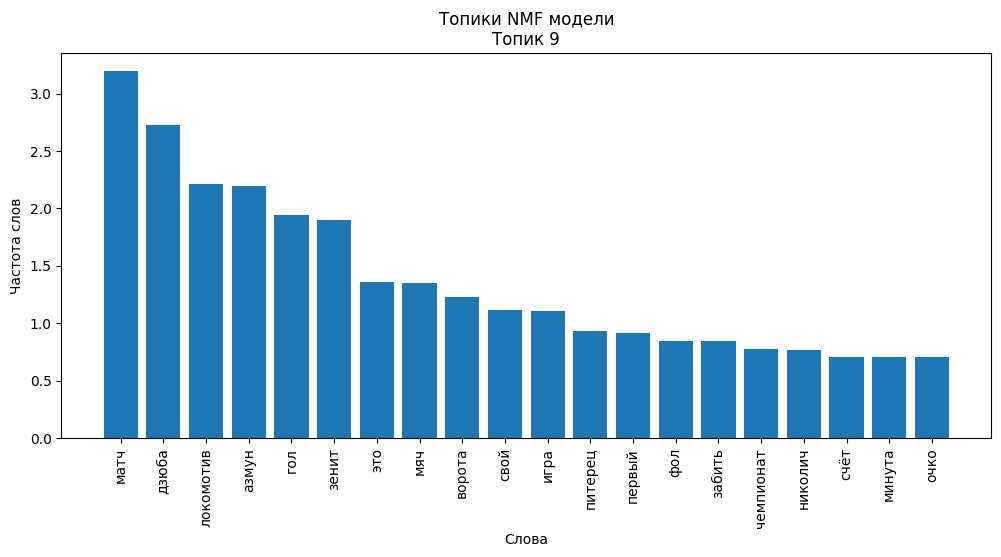

Топик #0: дзюба гол ворота карасев арбитр мяч локомотив рыбуса решение это удар судья фол рука матч рыбусы минута пабло столкновение локо


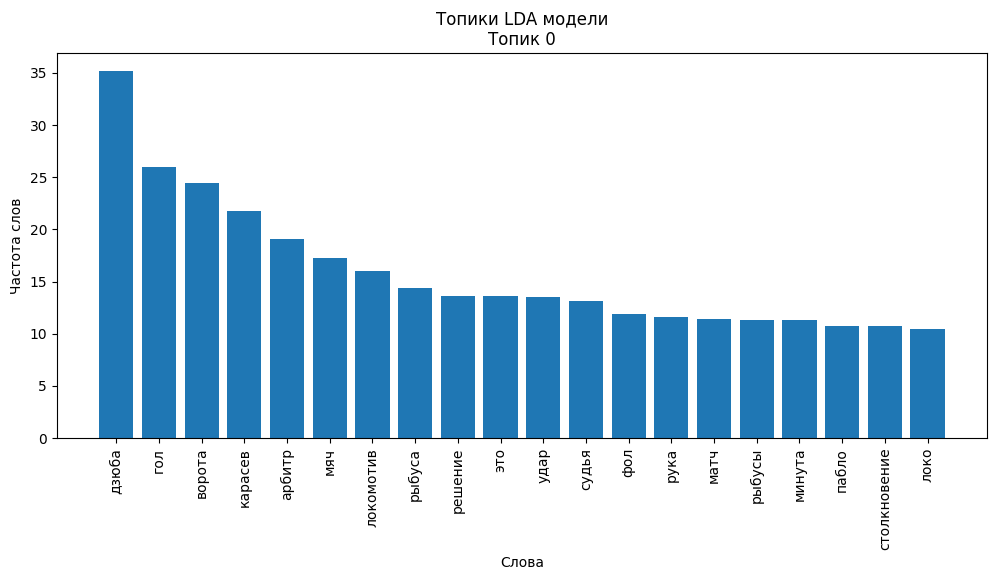

Топик #1: владимир болельщик матч охрана служба команда локомотив сектор раздевалка гостевой зенит управление автобус сердце весь сотрудник человек личный принимать рассказать


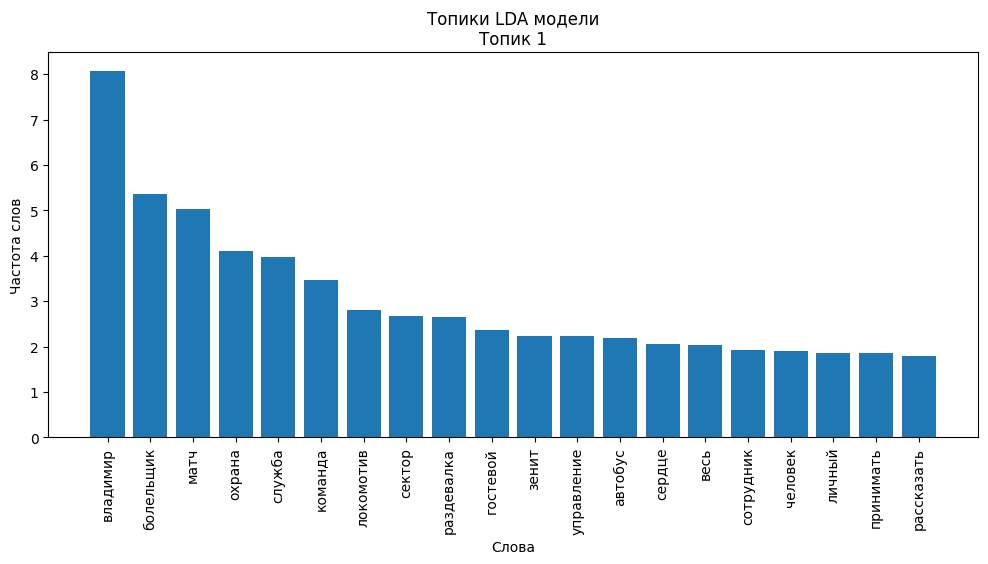

Топик #2: сегодня локомотив игра менее матч семак состав сыграть мяч выйти зенит стать забитый определённый пять всё сказать тренер оборона готовиться


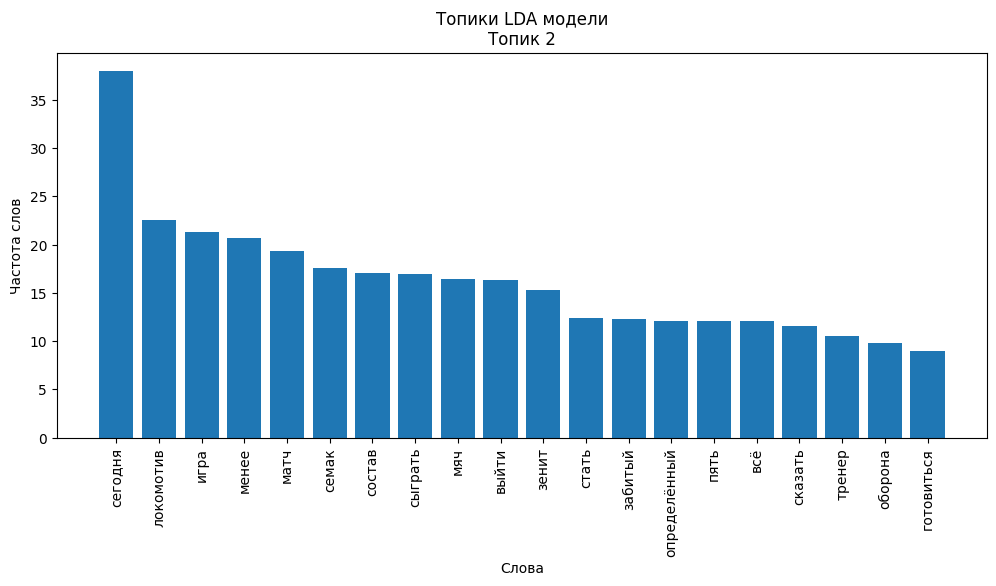

Топик #3: тимур матч болельщик рпл весь всё родный ярославль человек петербург команда автобус полиция время год действие семья локо игра приехать


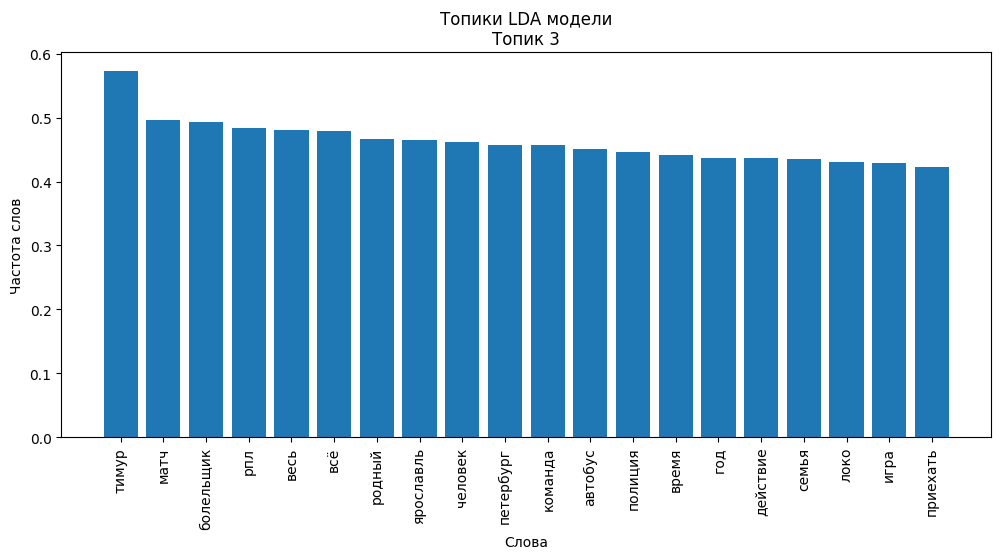

Топик #4: зенит это матч команда локомотив чемпион россия чемпионат семак который стать клуб всё дзюба сезон год свой победа подряд тренер


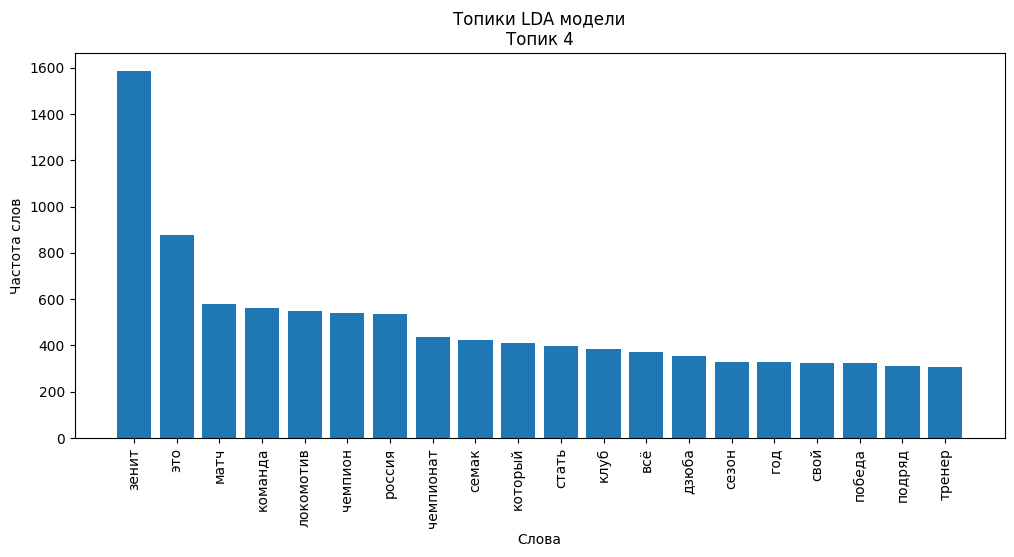

Топик #5: матч динамо тимур файзутдинов шайба файзутдин март голова хоккеист мхл это хоккейный игрок время локо попасть клуб лига который защитник


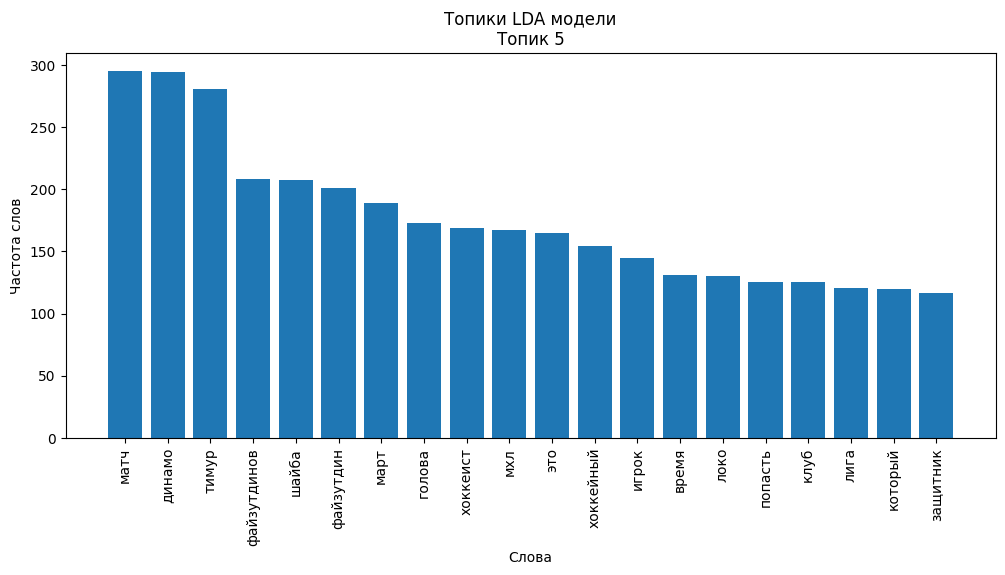

Топик #6: рфс ситуация организация праздник чемпионский фк зенит российский болельщик локомотив приходить сложиться максимально создавать задача условие подготовка оказать поддержка матч


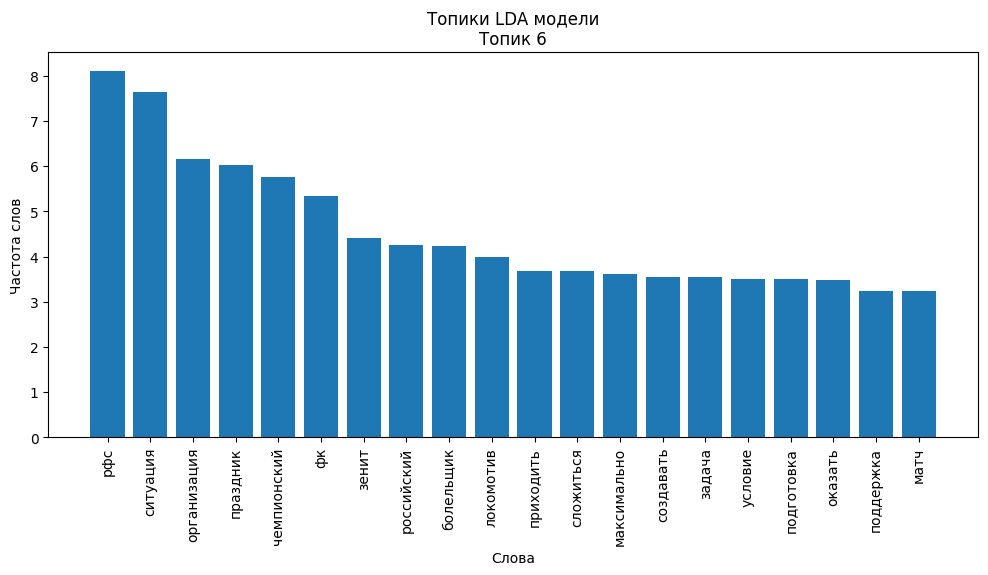

Топик #7: тимур хоккеист это команда шайба всё матч хоккейный игрок год динамо врач защита свой весь травма ярославль мочь парень спортсмен


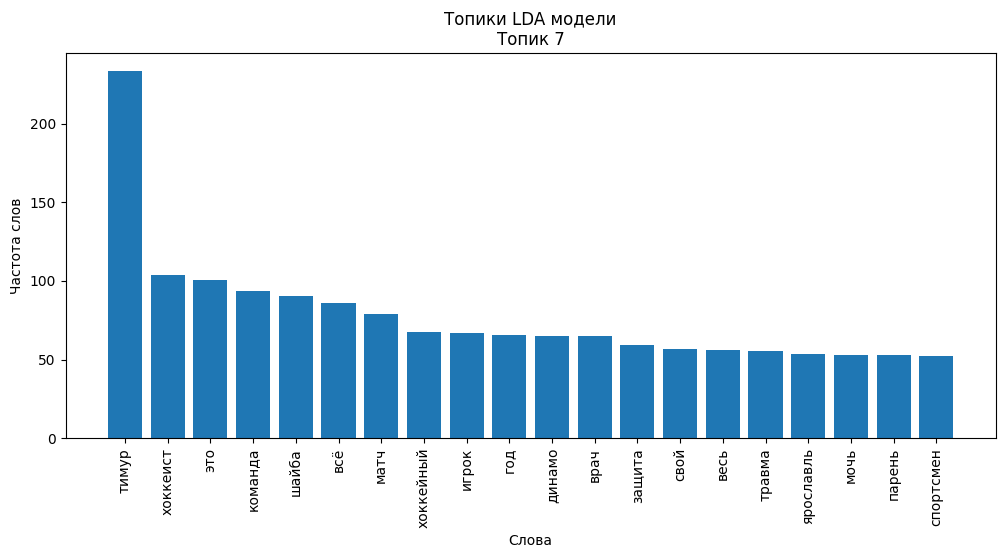

Топик #8: матч локомотив зенит болельщик это тимур свой команда который весь локо минута файзутдин автобус рпл динамо мяч второй рфс хоккейный


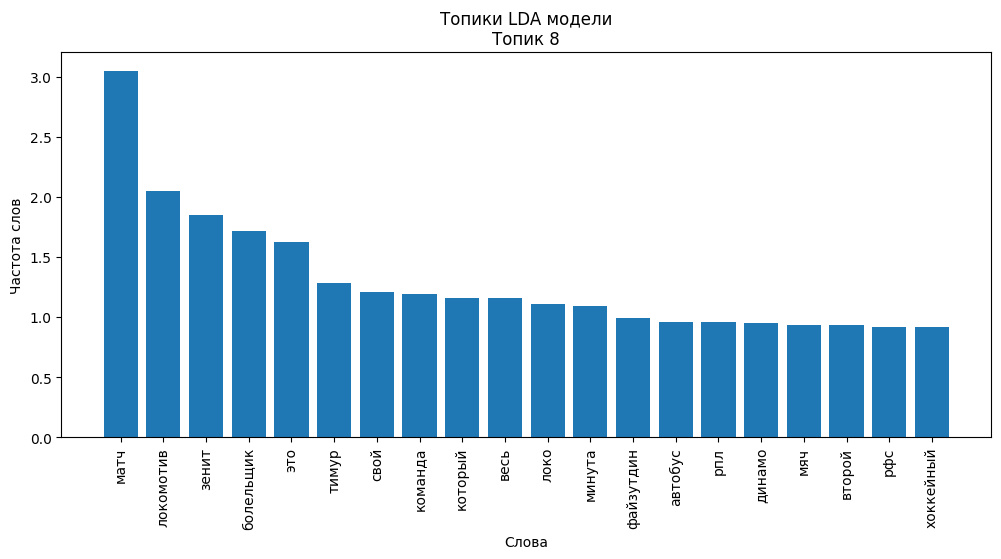

Топик #9: болельщик локомотив матч зенит автобус стадион гостевой команда отношение сектор это рпл клуб заявление весь который мера билет рфс сотрудник


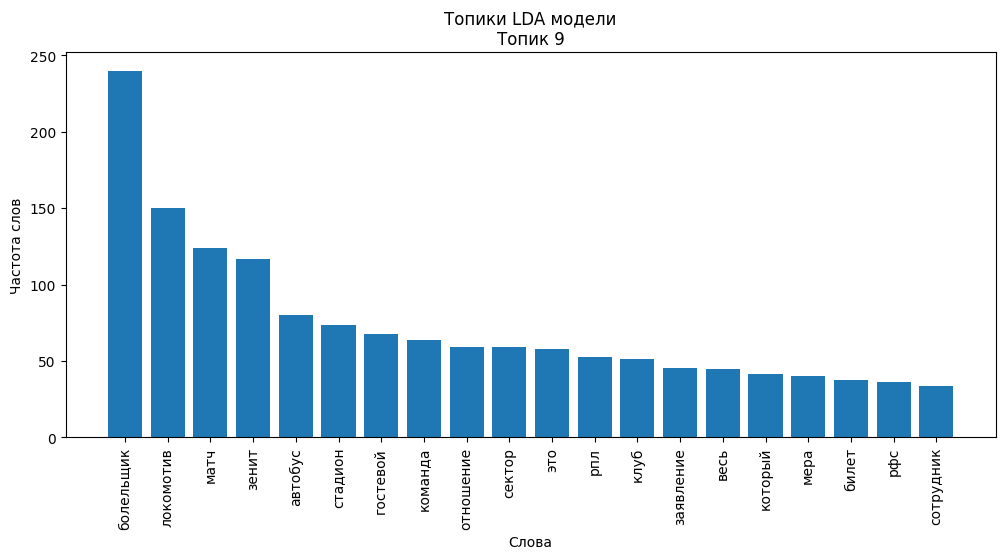

In [72]:
# Построение векторного представления
vectorizer = Change_vector_representation_method('count_vectorizer')
vectors = vectorizer.fit_transform(corpus)

nmf = NMF(
    n_components=n_components, 
    random_state=1,
    ).fit(vectors)

vectors_feature_names = vectorizer.get_feature_names_out()
plot_top_words(nmf, vectors_feature_names, n_top_words, 'Топики NMF модели\n')

lda = LatentDirichletAllocation(
    n_components=n_components, 
    max_iter=5, 
    learning_method='online', 
    learning_offset=50., 
    random_state=0
    ).fit(vectors)

vectors_feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, vectors_feature_names, n_top_words, 'Топики LDA модели\n')